Importamos las librerías necesarias

In [1]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn import tree, datasets, metrics
#from sklearn import neighbors, datasets, metrics
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
import math

Cargamos el conjunto de datos de cancer de mama

In [2]:
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target
data = np.concatenate((X, np.expand_dims(y, axis=1)), axis = 1)
data[0:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01,
        0.000e+00],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02,
        0.000e+00],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02

Realizamos la clasificación de si el tumor es benigno o maligno a partir de un decision stump. Es decir, un árbol de decisión de un sólo nivel.

In [31]:
np.random.seed(1234)
decStump = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)

Utilizamos un 70% de los datos para entrenamiento y un 30% para la prueba

In [32]:
np.random.seed(1234)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Entrenamos el decision stump

In [33]:
decStump.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

Realizamos las predicciones a partir de nuestro decision stump con los datos de entrenamiento

In [34]:
y_pred = decStump.predict(X_train)

Calculamos la matriz de confusión para el modelo evaluado con los datos de entrenamiento

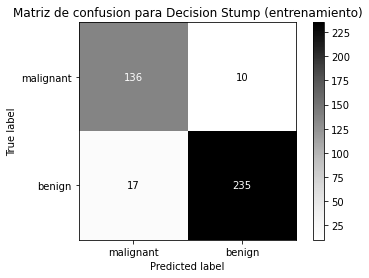

In [36]:
cm= metrics.confusion_matrix(y_train, y_pred)
metrics.plot_confusion_matrix(decStump,X_train,y_train,cmap=plt.cm.Greys)
plt.title("Matriz de confusion para Decision Stump (entrenamiento)")
tick_marks = np.arange(2)
plt.xticks(tick_marks, cancer.target_names)
plt.yticks(tick_marks, cancer.target_names)
plt.show()

Calculamos la exactitud y el kappa utilizando los datos de entrenamiento

In [40]:
print(cm)
print("Exactitud: ", metrics.accuracy_score(y_train, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y_train, y_pred))

[[136  10]
 [ 17 235]]
Exactitud:  0.9321608040201005
Kappa    :  0.8554207141511718


Realizamos las predicciones a partir de nuestro decision stump con los datos de prueba

In [41]:
y_pred = decStump.predict(X_test)

Calculamos la matriz de confusión para el modelo evaluado con los datos de prueba

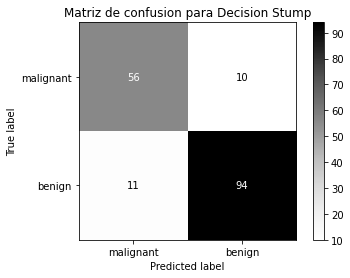

In [42]:
cm= metrics.confusion_matrix(y_test, y_pred)
metrics.plot_confusion_matrix(decStump,X_test,y_test,cmap=plt.cm.Greys)
plt.title("Matriz de confusion para Decision Stump")
tick_marks = np.arange(2)
plt.xticks(tick_marks, cancer.target_names)
plt.yticks(tick_marks, cancer.target_names)
plt.show()

Calculamos la exactitud y el kappa utilizando los datos de prueba

In [43]:
print(cm)
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))

[[56 10]
 [11 94]]
Exactitud:  0.8771929824561403
Kappa    :  0.741636088927261


Graficamos nuestro decision stump

[Text(167.4, 163.07999999999998, 'mean concave points <= 0.051\nentropy = 0.948\nsamples = 398\nvalue = [146, 252]\nclass = benign'),
 Text(83.7, 54.360000000000014, 'entropy = 0.246\nsamples = 245\nvalue = [10, 235]\nclass = benign'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.503\nsamples = 153\nvalue = [136, 17]\nclass = malignant')]

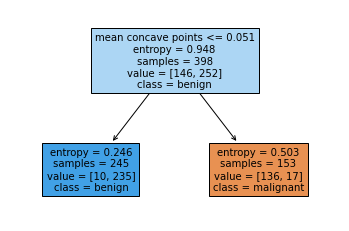

In [45]:
tree.plot_tree(decStump, feature_names=cancer.feature_names, class_names=cancer.target_names, filled=True)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])